In [4]:
cd drive/MyDrive/multitask_da/data/ISIC2016

/content/drive/MyDrive/multitask_da/data/ISIC2016


In [52]:
import pandas as pd
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Train

In [15]:
custom_header = ['File', 'Class']
df = pd.read_csv('train_labels.csv', header=None, names=custom_header)

def transform_label(x):
  if x == 'benign':
    return 0
  else:
    return 1

df['Class'] = df['Class'].apply(transform_label)

In [25]:
image_list = df['File'].to_list()

In [32]:
df

,File,Class
0,ISIC_0000000,0
1,ISIC_0000001,0
2,ISIC_0000002,1
3,ISIC_0000004,1
4,ISIC_0000006,0
...,...,...
895,ISIC_0011393,0
896,ISIC_0011397,0
897,ISIC_0011398,0
898,ISIC_0011400,0


In [51]:
skin_images = []
mask_labels = []
class_labels = []

for image_path in tqdm(image_list):
  skin_image = cv2.imread('train/' + image_path + '.jpg')
  skin_image = cv2.cvtColor(skin_image, cv2.COLOR_BGR2RGB)
  skin_image = skin_image/255
  skin_image = cv2.resize(skin_image, (256, 256), interpolation=cv2.INTER_AREA)
  skin_images.append(skin_image)

  mask_label = cv2.imread('train/' + image_path + '_Segmentation.png', cv2.IMREAD_GRAYSCALE)
  mask_label = mask_label/255
  mask_label = cv2.resize(mask_label, (256, 256), interpolation=cv2.INTER_NEAREST)
  mask_labels.append(mask_label)

  # Đọc class nhãn
  class_labels.append(int(df.loc[df['File'] == image_path, 'Class'].iloc[0]))

100%|██████████| 900/900 [12:18<00:00,  1.22it/s]


In [53]:
skin_images = np.array(skin_images)
mask_labels = np.array(mask_labels)
class_labels = np.array(class_labels)

In [88]:
np.save('../../loaded_data/ISIC2016/train/skin_images.npy', skin_images)
np.save('../../loaded_data/ISIC2016/train/mask_labels.npy', mask_labels)
np.save('../../loaded_data/ISIC2016/train/class_labels.npy', class_labels)

In [72]:
k = 24
image_list[k]

'ISIC_0000035'

In [73]:
class_labels[k]

np.int64(1)

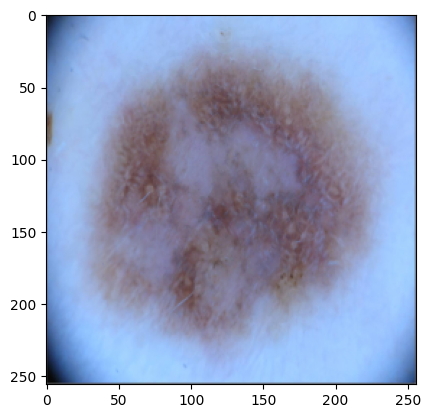

In [74]:
plt.imshow(skin_images[k])

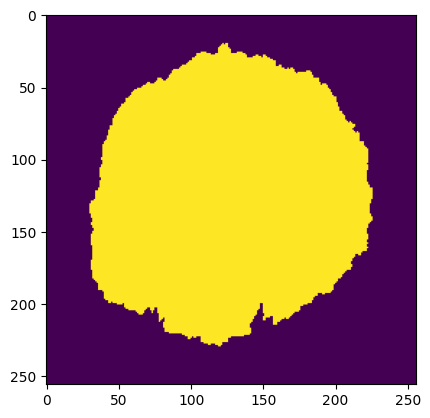

In [75]:
plt.imshow(mask_labels[k])

# Test

In [93]:
custom_header = ['File', 'Class']
df = pd.read_csv('test_labels.csv', header=None, names=custom_header)

In [94]:
image_list = df['File'].to_list()

In [95]:
df

,File,Class
0,ISIC_0000003,0.0
1,ISIC_0000012,0.0
2,ISIC_0000013,1.0
3,ISIC_0000014,0.0
4,ISIC_0000015,0.0
...,...,...
374,ISIC_0011367,0.0
375,ISIC_0011374,1.0
376,ISIC_0011384,0.0
377,ISIC_0011386,0.0


In [96]:
skin_images = []
mask_labels = []
class_labels = []

for image_path in tqdm(image_list):
  skin_image = cv2.imread('test/' + image_path + '.jpg')
  skin_image = cv2.cvtColor(skin_image, cv2.COLOR_BGR2RGB)
  skin_image = skin_image/255
  skin_image = cv2.resize(skin_image, (256, 256), interpolation=cv2.INTER_AREA)
  skin_images.append(skin_image)

  mask_label = cv2.imread('test/' + image_path + '_Segmentation.png', cv2.IMREAD_GRAYSCALE)
  mask_label = mask_label/255
  mask_label = cv2.resize(mask_label, (256, 256), interpolation=cv2.INTER_NEAREST)
  mask_labels.append(mask_label)

  # Đọc class nhãn
  class_labels.append(int(df.loc[df['File'] == image_path, 'Class'].iloc[0]))

100%|██████████| 379/379 [04:41<00:00,  1.35it/s]


In [97]:
skin_images = np.array(skin_images)
mask_labels = np.array(mask_labels)
class_labels = np.array(class_labels)

In [141]:
np.save('../../loaded_data/ISIC2016/test/skin_images.npy', skin_images)
np.save('../../loaded_data/ISIC2016/test/mask_labels.npy', mask_labels)
np.save('../../loaded_data/ISIC2016/test/class_labels.npy', class_labels)

In [131]:
k = 38
image_list[k]

'ISIC_0000141'

In [140]:
np.unique(skin_images)

array([0.00000000e+00, 5.78468330e-07, 6.57103405e-07, ...,
       1.00000009e+00, 1.00000009e+00, 1.00000009e+00])

In [132]:
class_labels[k]

np.int64(1)

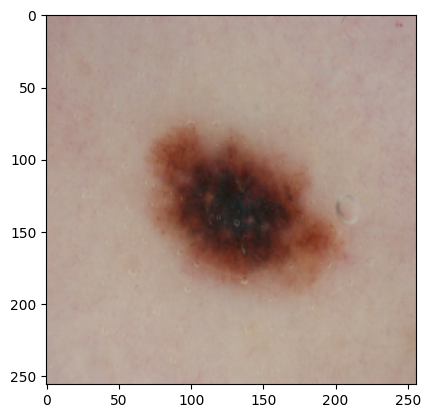

In [133]:
plt.imshow(skin_images[k])

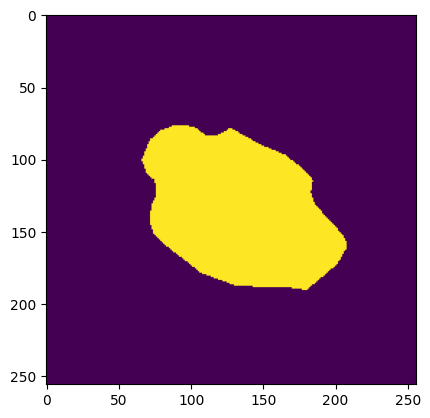

In [134]:
plt.imshow(mask_labels[k])